In [9]:
'''
URJC / GIA / Aprendizaje Automático 1 / Curso 23-24
alfredo.cuesta@urjc.es
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(5,5)
np.set_printoptions(precision=2)
pd.set_option("display.precision", 4)

# Introducción

El algoritmo del descenso de gradiente nos permite resolver cualquier problema de optimización de aprendizaje supervisado siempre que dispongamos de una función $~\mathcal L({\bf w})~$ denominada **función de pérdida**.

# Problema de optimización de aprendizaje supervisado

Recordamos que un problema supervisado es aquel en el que cada ejemplo está emparejado a un valor objetivo o a una etiqueta o clase, según sea una tarea de regresión o de clasificación respectivamente.

Por tanto tenemos a nuestra disposición:
- un conjunto de datos $\bf X$ en forma de tabla $N\times D$
- un conjunto $\bf Y$ de valores objetivos o etiquetas, que puede ser:
  - Para regresión: un vector columna de $N$ elementos en el primer caso.
  - Para clasificación: un vector columna o una matriz si se utiliza una representación _one-hot._
  A este conjunto frecuentemente se le denomina por su término en inglés, _ground truth_.

Evidentemente también se supone que tenemos un modelo, o sea una función paramétrica $~f({\bf x},{\bf w})~$.

El objetivo es encontrar los parámetros óptimos del modelo. <br>
Pero **¿por qué unos parámetros son mejor que otros?**  


## Función de pérdida

El objetivo del modelo es predecir, con la mayor tasa de acierto posible, el valor objetivo o la etiqueta de los ejemplos que reciba.

Cuando los ejemplos pertenecen al conjunto de entrenamiento conocemos el valor objetivo o la etiqueta real de cada ejenplo.

La **función de pérdida** devuelve una medida relacionada con los fallos cometidos por el modelo respecto del _ground truth_.

Sea $~\mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big)~$ dicha función, si es **derivable en todo punto** ¡ entonces podemos aplicar el **descenso del gradiente** !.


## Expresión general para el aprendizaje supervisado

Con la "definición" de Función de pérdida dada, cuantos **menos** fallos **mejor** es el modelo.

Por tanto el problema de aprendizaje supervisado se formula matemáticamente como el siguiente problema de optimización.

$$
{\bf w}^* =
\mathop{\arg\min}\limits_{{\bf w}}
 ~\mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big)
$$

En definitiva, para realizar una tarea supervisada necesitamos:
- un **conjunto de datos etiquetado**: esto debe ser proporcionado.
- un **modelo** y una **función de pérdida**: esto es una decisión nuestra, como profesionales de IA.

De momento sólo hemos estudiado modelos lineales, es decir
$  f({\bf x};{\bf w}) = {\bf w}^\top{\bf x}  $
(asumiendo la existencia de una característica _dummy_)


Respecto a la función de pérdida, para modelos con esta expresión (y para otros también), tenemos varias posibilidades.

En primer lugar hay que saber si se trata de un problema de regresión o de clasificación.

A continuación veremos diferentes posibilidades para ambos.

## Funciones de pérdida para regresión

En estos casos
$~
f({\bf x};{\bf w}): (\mathbb R^{D}; \mathbb R^{D}) \rightarrow \mathbb R,
~$
y el valor objetivo $y \in \mathbb R$ también.

Por tanto, una función de pérdida para regresión debe tener las siguientes características:
- Calcular $\delta_{(i)} = \left(y^{(i)} - f({\bf x}^{(i)},{\bf w}) \right)$ para cada $i = 1,2,\ldots,N.$
- Convertir $\delta_{(i)}$ en un valor positivo para todo $i$.
- Hacer el promedio para todos los ejemplos.

Algunas funciones de pérdida con estas características son:

**MSE** (_Mean Squared Error_)
$$
 \mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big)
 =\frac{1}{N}\sum\limits_{i=1}^{N}\left(y^{(i)} - f({\bf x}^{(i)},{\bf w})\right)^2
$$

**MAE** (_Mean Absolute Error_)
$$
 \mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big)
 =\frac{1}{N}\sum\limits_{i=1}^{N}\left\vert y^{(i)} - f({\bf x}^{(i)},{\bf w})\right\vert
$$

**Log-cosh**
$$
 \mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big)
 =\frac{1}{N}\sum\limits_{i=1}^{N} \log\left(\cosh\big( y^{(i)} - f({\bf x}^{(i)})\big)\right)
$$

## Funciones de pérdida para clasificación

A diferencia de la regresión, la clasificación puede tener varias formas.
1. Clasificación binaria:<br>
_un ejemplo sólo puede pertenecer a 2 clases excluyentes_
1. Clasificación multi-clase:<br>
_un ejemplo puede pertenecer a varias clases pero excluyentes_
1. Clasificación multi-etiqueta:<br>
_un ejemplo puede pertenecer a una o varias clases al mismo tiempo_


Los tres casos se pueden abordar como un problema de regresión y después utilizar una función discriminante.

PERO ya hemos aprendido que la regresión logística es un modo mucho más natural de abordar la clasificación porque incorpora una medida de la probabilidad de pertencer a una cierta clase.

Sin embargo, cuando trabajamos con probabilidades las pérdidas citadas arriba **NO** son apropiadas.

Esta cuestión es tan importante que merece un cuaderno para ella sola.

Por este motivo, **el resto de este cuaderno está dedicado exclusivamente a las pérdidas citadas.**



# Descenso del gradiente con pérdidas de regresión

Vamos a calcular analíticamente las fórmulas para encontrar los parámetros óptimos de un modelo lineal mediante descenso del gradiente.


Comenzamos recordando las dos expresiones que necesitamos

$$
\begin{align}
\text{Problema de optimización} &:\quad
{\bf w}^* =
\mathop{\arg\min}\limits_{{\bf w}}
 ~\mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big) \\
\text{Regla de actualización} &:\quad
{\bf w}^\text{nuevo} = {\bf w}^\text{actual} - \eta\cdot\nabla_{\bf w}{\mathcal L({\bf w}^\text{actual})}
 \end{align}
$$

Por tanto el primer paso es calcular el gradiente de la pérdida,
$\nabla_{\bf w}\mathcal L.$

Y a continuación hay que utilizar ese cálculo en la regla de actualización.


## Gradiente de la pérdida MSE

$$
\begin{align}
  \nabla_{\bf w}\mathcal L &=
  \left[ \frac{\partial \mathcal L}{\partial w_i}
  \right]_{i=1,\ldots,D}
\end{align}
$$

Para calcular la derivada parcial de la pérdida respecto del parámetro $i$-ésimo vamos a reescribir la pérdida del siguiente modo:
$$
\mathcal L =
\frac{1}{N}\sum\limits_{k=1}^N \delta_{(k)}^2,
$$
con
$$\delta_{(k)} = y^{(k)} - f({\bf x}^{(k)},{\bf w}),$$
y con
$$
f({\bf x}^{(k)},{\bf w}) = x_1^{(k)}w_1 + x_2^{(k)}w_2 + \cdots + x_D^{(k)}w_D.
$$

Así podemos aplicar la regla de la cadena de la derivada, de modo que para el ejemplo $k$-ésimo tenemos:

$$
\frac{\partial \mathcal L}{\partial w_i} =
\frac{\partial \mathcal L}{\partial \delta_{(k)}}\cdot
\frac{\partial \delta_{(k)}}{\partial f}\cdot
\frac{\partial \mathcal f}{\partial w_i}
$$

>Estos 3 términos son:
$$
\begin{array}{llllll}
\frac{\partial \mathcal L}{\partial \delta_{(k)}} &= \frac{1}{N}2\delta_{(k)}  &,&
\frac{\partial \delta^{(k)}}{\partial f} &= -1  &,&
\frac{\partial \mathcal f}{\partial w_i} &= x_i^{(k)} \\
\end{array}
$$

Juntando todo y recordando que tenemos el sumatorio de $N$ términos $\delta^2$:
$$
\frac{\partial \mathcal L}{\partial w_i} =
\frac{1}{N}\sum\limits_{k=1}^{N}
 2\delta_{(k)}(-1)x_i^{(k)} =
\frac{2}{N}\sum\limits_{k=1}^{N}
 \left( f({\bf x}^{(k)},{\bf w}) - y^{(k)} \right)\left( x_i^{(k)} \right),
$$
que para el caso de modelos lineales es
$$
\frac{\partial \mathcal L}{\partial w_i} =
\frac{2}{N}\sum\limits_{k=1}^{N}
 \left( {\bf w}^\top{\bf x}^{(k)} - y^{(k)} \right)\left( x_i^{(k)} \right)
$$

## Regla de actualización de parámetros

Una vez se conoce la expresión del gradiente para todo punto, sólo hay que utilizarla en la regla de actualización del descenso de gradiente.


# Código

Aunque el descenso del gradiente está programado en Scikit-Learn, el código que vamos a ver a continuación enseña el funcionamiento interno de bibliotecas como Tensorflow o PyTorch, que son esenciales en Deep Learning y en la mayor parte de los avances en IA hoy en día.

Es un código modularizado en clases y con pocas modificaciones se pueden hacer muchas cosas.

## Modelo

Comenzamos creando la clase `F` que contendrá nuestro modelo lineal $f({\bf x},{\bf w}) = {\bf w}^\top{\bf x}.$

La clase tiene 2 métodos:
- `val` devuelve el valor de la función para un vector de parámetros y un ejemplo
- `grad_w` devuelve la derivada de $f$ respecto de ${\bf w}$.

Lo interesante es que, cada vez que instanciemos un objeto de esta clase, éste lleva incorporada la derivada respecto de sus parámetros.

In [10]:
class F:
    def __init__(self, w):
        self.w = w

    def val(self, x):
        return np.matmul(self.w.T, x).ravel()

    def grad_w(self, x):
        return x

## Pérdida MSE
A continuación creamos la clase `MSE`, que tiene los mismos métodos de la clase del modelo:  `val` y `grad_w`

- La clase se instancia para un modelo.
- Cuando se ejecuta `val` se invoca el método `val` del modelo.
- Cuando se ejecuta `grad_w` se calcula el valor de la predicción con el modelo y se invoca a `grad_w` del modelo.

De esta manera, un objeto de esta clase incorpora la derivada respecto del modelo. No necesitamos codificar nada más porque el modelo que le hemos pasado ya lleva sus propias derivadas.

In [11]:
class MSE:
    def __init__(self, F):
        self.F = F

    def val(self, x, ytrue):
        return ( ytrue-self.F.val(x) )**2

    def grad_w(self, x, ytrue):
        yhat = self.F.val(x)
        return 2*(yhat-ytrue)*self.F.grad_w(x)

## Descenso de gradiente

Creamos una clase para encapsular el algoritmo de descenso de gradiente.

- El constructor recibe la función de pérdida que queremos utilizar y opciones de configuración (_learning rate_ y número de iteraciones)
- El método `update` implementa la regla de actualización
- El método `fit` ejecuta el algoritmo para un ejemplo `x` emparejado con su valor objetivo `ytrue`.

In [12]:
class GradientDescent:
    def __init__(self, loss, lr = 0.1, Niter = 10):
        self.loss = loss
        self.lr = lr
        self.Niter = Niter

    def update(self,x,ytrue):
        self.loss.F.w = self.loss.F.w - ( self.lr * self.loss.grad_w(x,ytrue) )

    def fit(self,x,ytrue):
        steps = [self.loss.F.w]
        for k in range(self.Niter):
            self.update(x,ytrue)
            steps.append(self.loss.F.w)
        return steps

## Ejecución

Vamos a hacer un ejemplo muy-muy-muy sencillo.

Nuesto conjunto de datos consiste en una tabla con 1 sólo ejemplo de dos características $(x_1, x_2)$ y su valor objetivo $y$.

La tabla es:
<table>
  <tr ALIGN=CENTER>
    <th>Ej.</th>
    <th>$x_1$</th>
    <th>$x_2$</th>
    <th>$y$</th>
  </tr>
  <tr ALIGN=CENTER>
    <td>#1</td>
    <td>$0.8$</td>
    <td>$1.2$</td>
    <td>$5.0$</td>
  </tr>
</table>
Sin embargo, al ser un solo ejemplo, lo vamos a crear como un vector columna.

Además utilizamos una tasa de aprendizaje (_learning rate_) del 10% y 50 iteraciones.

In [15]:
# Inicialización
x  = [0.8, 1.2]
w_init = [0, 0]
ytrue = 5
learning_rate = 0.1
Niter = 50

# hacemos que x y w_init sean vectores columna
x  = np.expand_dims(np.array(x), axis=1)
w_init = np.expand_dims(np.array(w_init), axis=1)

# ejecución del descenso del gradiente
fx = F(w_init)
L = MSE(fx)
GD = GradientDescent(L, lr=learning_rate, Niter=Niter)
steps = GD.fit(x,ytrue)

# resultados
print('w_star = \n',steps[-1]) #<- w_star es el último w obtenido
print('y_hat = %.3f'%(fx.val(x)))
print('perdida = ',L.val(x,ytrue))
print('error = %.5f'%(ytrue-fx.val(x)) )

w_star = 
 [[1.92]
 [2.88]]
y_hat = 5.000
perdida =  [1.09e-22]
error = 0.00000


## Visualización

Vamos a crear una figura que muestre el valor de la función de pérdida en un intervalo del espacio 2D $\text{[-bound, bound]}^2$.

Para ello, como ya hemos hecho en otras ocasiones, debemos hacer un barrido con `linspace` y `meshgrid` para obtener un mallado de puntos sobre los que evaluar la pérdida.

Con estos valores podemos dibujar las curvas de nivel (_contorno_) de la función de pérdida de "fondo".

A continuación dibujamos sobre ese fondo la trayectoria de $\bf w$ seguida por el descenso de gradiente.

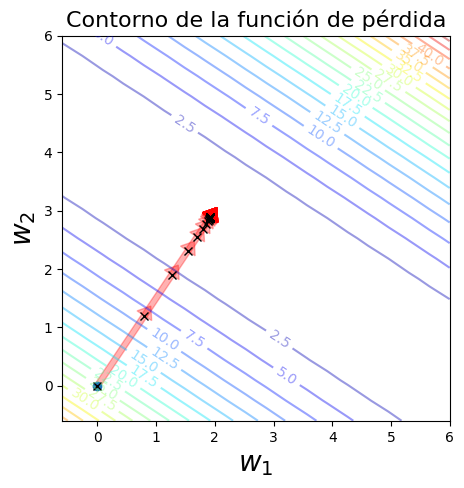

In [20]:
Ns = 20
bounds = 6
rangeW0 = np.linspace(-bounds/10, bounds, Ns)
rangeW1 = np.linspace(-bounds/10, bounds, Ns)
[WW0, WW1] = np.meshgrid(rangeW0, rangeW1)
WW0 = np.expand_dims(WW0.ravel(), axis=0)
WW1 = np.expand_dims(WW1.ravel(), axis=0)
WW = np.vstack((WW0,WW1))

#-- contorno de la función de pérdida
fun = F(w_init)
L = MSE(fun)
L_values = np.zeros(WW.shape[1])
for kc in range(WW.shape[1]):
    w_try = WW[:,kc]
    fun.w = w_try
    L_values[kc] = L.val(x,ytrue)

L_values = L_values.reshape(Ns,Ns)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
contours = ax.contour(rangeW0, rangeW1, L_values, 20, cmap='jet', alpha=0.4)
ax.clabel(contours)
ax.set_xlabel('$w_1$', fontsize=20)
ax.set_ylabel('$w_2$', fontsize=20)
ax.set_title('Contorno de la función de pérdida', fontsize=16)

#-- iteraciunes del descenso del gradiente
ax.plot(w_init[0],w_init[1],'o')
for ks, w_step in enumerate(steps):
    w_step = w_step.ravel()
    ax.plot(w_step[0],w_step[1],'kx')
    if ks < len(steps)-1:
        w_next = steps[ks+1].ravel()
        ax.arrow(w_step[0],w_step[1],
                 w_next[0]-w_step[0], w_next[1]-w_step[1],
                 width=.1, head_length=.2, alpha=0.3, color='r' )
plt.show()

# Ejercicios

Calcular la regla de actualización de pesos si utilizamos la pérdida MAE

Crear una clase MAE que implemente la pérdida MAE y que incorpore el método `grad_w`.

Después repetir el ejemplo sencillo con está pérdida.

Cambiar el código para que se pueda ejecutar sobre un conjunto de datos con $N>1$.